# Remove false positives from night sky emission lines

We found four night sky emission lines in our final pool of candidates:
[5083.5, 5405.88, 5577.4, 5896.0]

5083.5: HIP68030

5405.88: HIP68030

5577.4: HIP47990 TIC142276270 HIP101262 HIP98677 TIC198456933 TIC219778329

5896.0: HIP45836 HIP117463, DON'T FORGET HIP114430

This rules out a total of 10 events corresponding to nine stars.
ELEVEN EVENTS: HIP 114430

In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.io.fits as fits
from glob import glob

plt.rcParams["figure.dpi"] = 300
# plt.rcParams["figure.figsize"] = (8,5)
# plt.rcParams.update({'font.size': 19})

In [2]:
directory = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/6sResults/'
persistent_residuals = pd.read_csv(directory + 'r_persistent_events.csv')
sky_emission_lines = [5083.50, 5405.88, 5577.4, 5577.42, 5895.96, 5895.98]

In [3]:
persistent_residuals[persistent_residuals['rounded r unshifted wl'] == 5083.5].groupby('star').first()
print('HIP 68030 has a sky emission line at 5083.5')

HIP 68030 has a sky emission line at 5083.5


In [4]:
persistent_residuals[persistent_residuals['rounded r unshifted wl'] == 5083.5].groupby('star').first()
print('HIP 68030 has a sky emission line at 5083.26')

HIP 68030 has a sky emission line at 5083.26


In [5]:
persistent_residuals[persistent_residuals['rounded r unshifted wl'] == 5577.4].groupby('star').first()
print('HIP47990 and TIC142276270 has a sky emission line at 5577.40')

HIP47990 and TIC142276270 has a sky emission line at 5577.40


In [6]:
persistent_residuals[persistent_residuals['rounded r unshifted wl'] == 5577.42].groupby('star').first()
print('HIP101262 and HIP98677 and TIC198456933 and TIC219778329 have a sky emission line at 5577.41')

HIP101262 and HIP98677 and TIC198456933 and TIC219778329 have a sky emission line at 5577.41


In [7]:
persistent_residuals[persistent_residuals['rounded r unshifted wl'] == 5895.96].groupby('star').first()
print('HIP45836 has a sky emission line at 5895.97')


HIP45836 has a sky emission line at 5895.97


In [8]:
persistent_residuals[persistent_residuals['rounded r unshifted wl'] == 5895.98].groupby('star').first()
print('HIP117463 has a sky emission line at 5895.98')

HIP117463 has a sky emission line at 5895.98


# Plots for Paper

In [9]:
star = 'HIP117463'
persistent_residuals[persistent_residuals['star'] == star]

,Unnamed: 0,star,identifier,r shifted wl,r unshifted wl,r heights,r AMD heights,rounded r shifted wl,observation time,rounded r unshifted wl
167,12,HIP117463,HIP117463_9,5895.866519,5896.006220,0.379543,7.550438,5895.86,2019-11-06T08:55:49.85,5896.00
168,11,HIP117463,HIP117463_8,5895.866519,5896.006220,0.427691,8.259848,5895.86,2019-11-06T08:50:05.64,5896.00
169,10,HIP117463,HIP117463_10,5895.866519,5895.986262,0.345801,6.869269,5895.86,2019-11-06T09:01:34.06,5895.98


In [10]:
observed_wl = 5896.006220
rest_wl = 5895.866519

In [11]:
apf_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/apf_data_files/'
observed_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/observed_data_files/'
rest_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/rest_data_files/'
resid_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/resid_data_files/'

APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl_image = wl_file[0].data

apf_files = np.load(apf_directory + star + '.npy')
observed_files = np.load(observed_directory + star + '.npy')
rest_files = np.load(rest_directory + star + '.npy')
resid_files = np.load(resid_directory + star + '.npy')

arr = np.round(wl_image, 1) == np.round(observed_wl, 1)
order = np.where(arr)[0][0]

## Plot SM residuals in rest frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP117463_8_NDRR.fits
HIP117463
2019-11-06T08:50:05.64


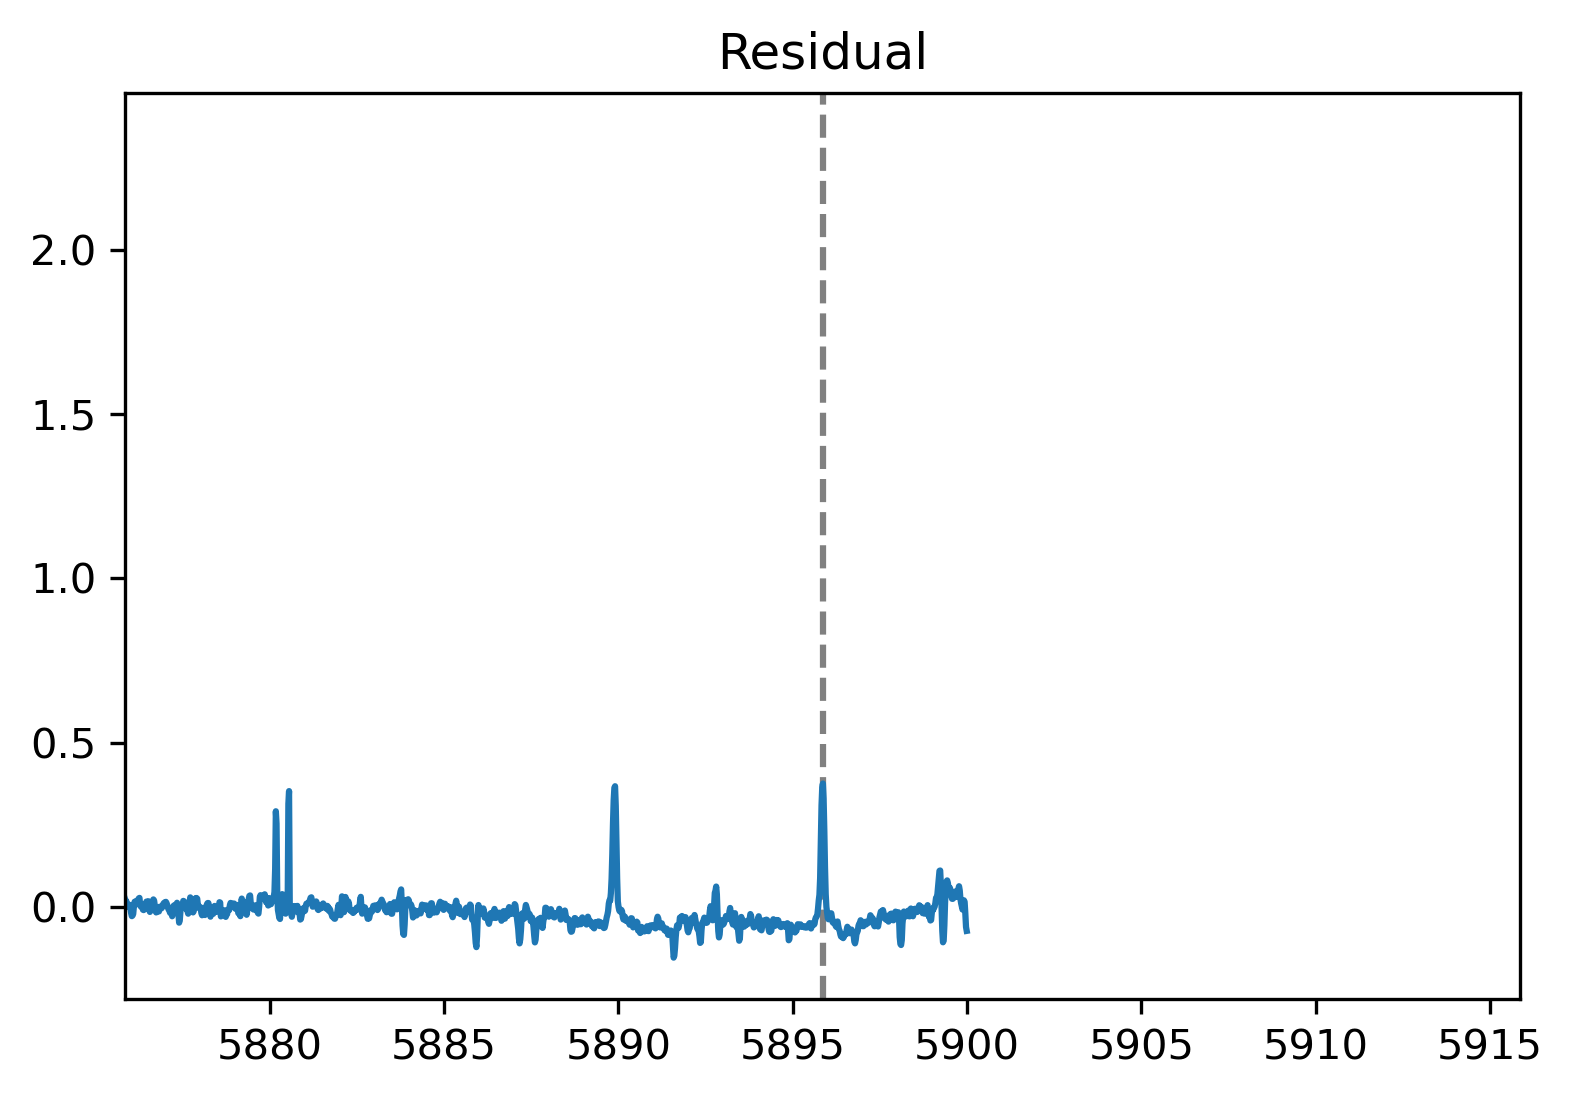

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP117463_9_NDRR.fits
HIP117463
2019-11-06T08:55:49.85


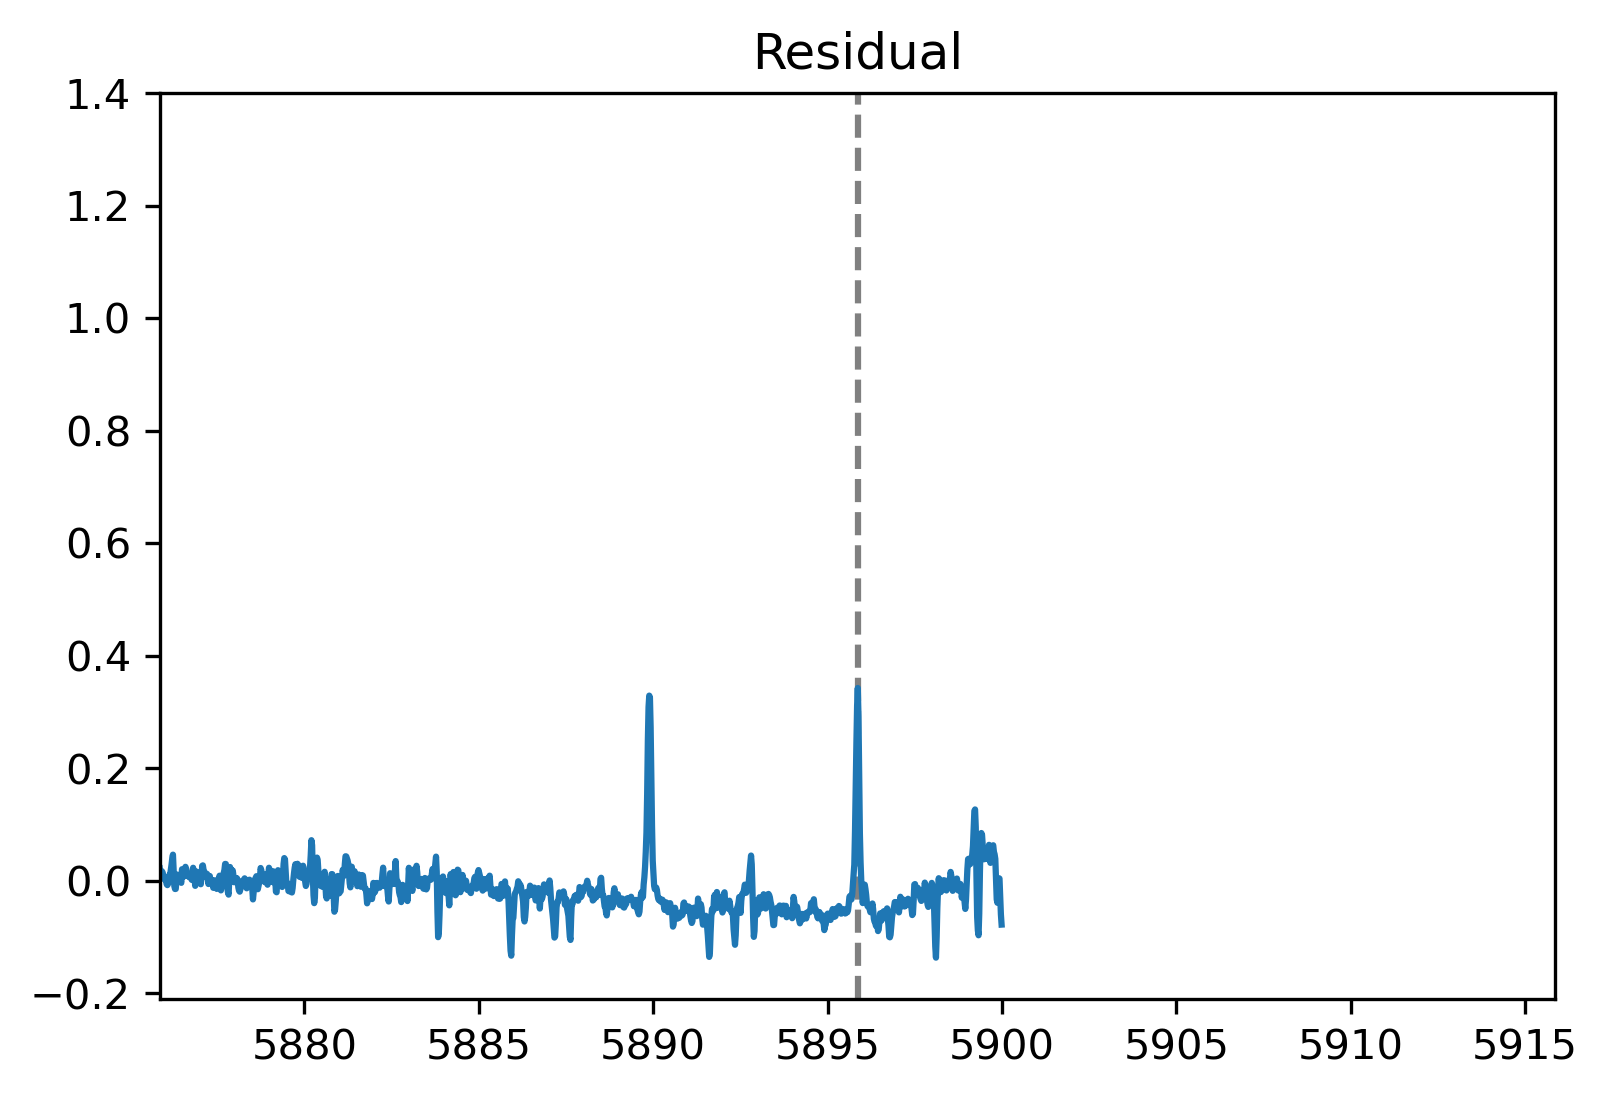

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP117463_10_NDRR.fits
HIP117463
2019-11-06T09:01:34.06


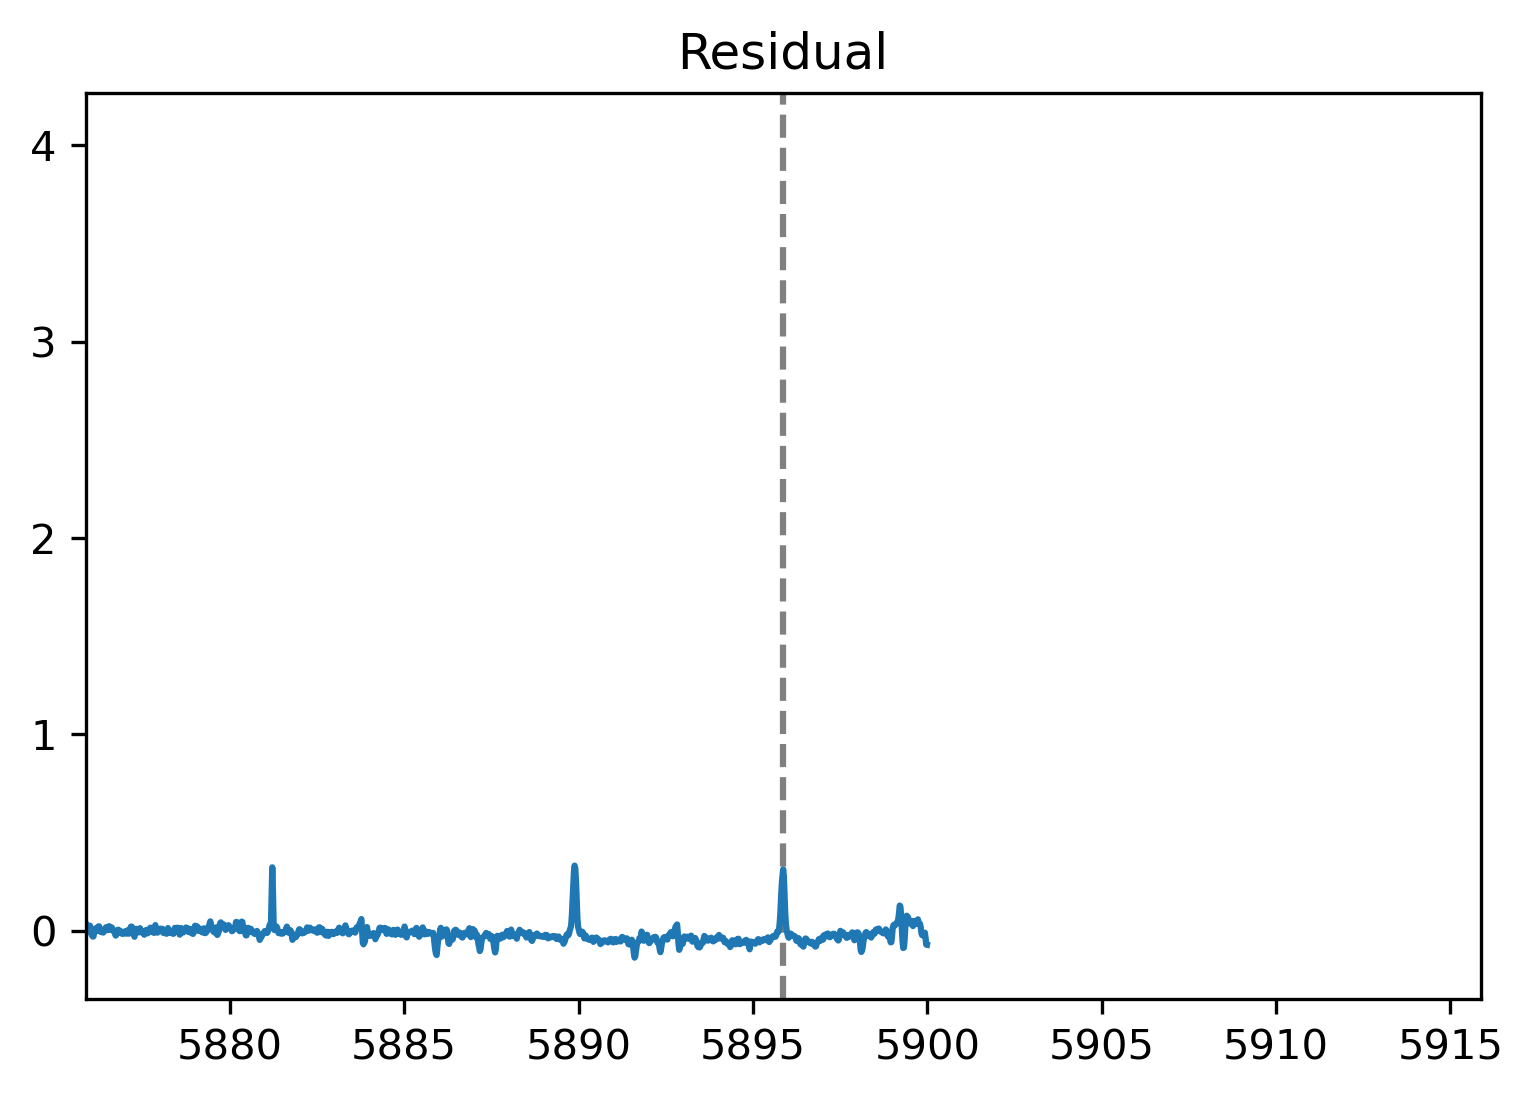

In [12]:
for file in resid_files:
    subfile = fits.open(file)
    flux = subfile[1].data
    wl = subfile[2].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(rest_wl, ls='--', color='gray')
    plt.plot(wl, flux)
    plt.xlim(rest_wl-20, rest_wl+20)
    plt.title('Residual')
    plt.show()

## Plot SM spectra in rest frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP117463_8_NDRS.fits
HIP117463
2019-11-06T08:50:05.64


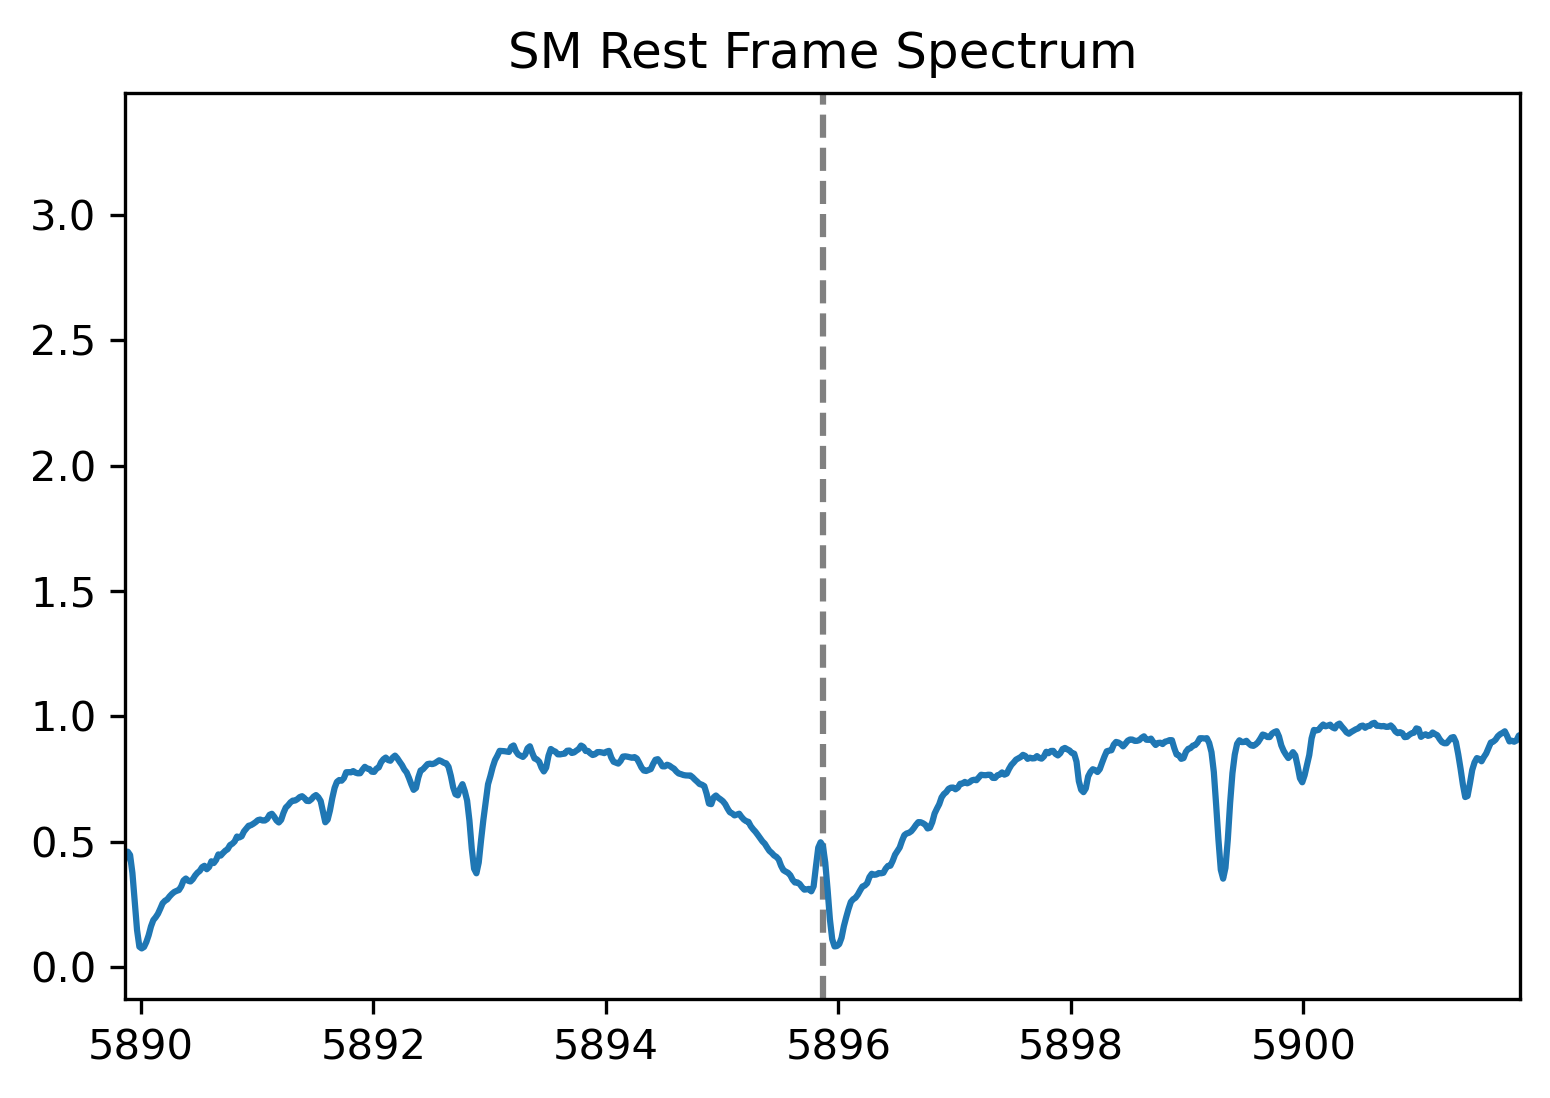

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP117463_9_NDRS.fits
HIP117463
2019-11-06T08:55:49.85


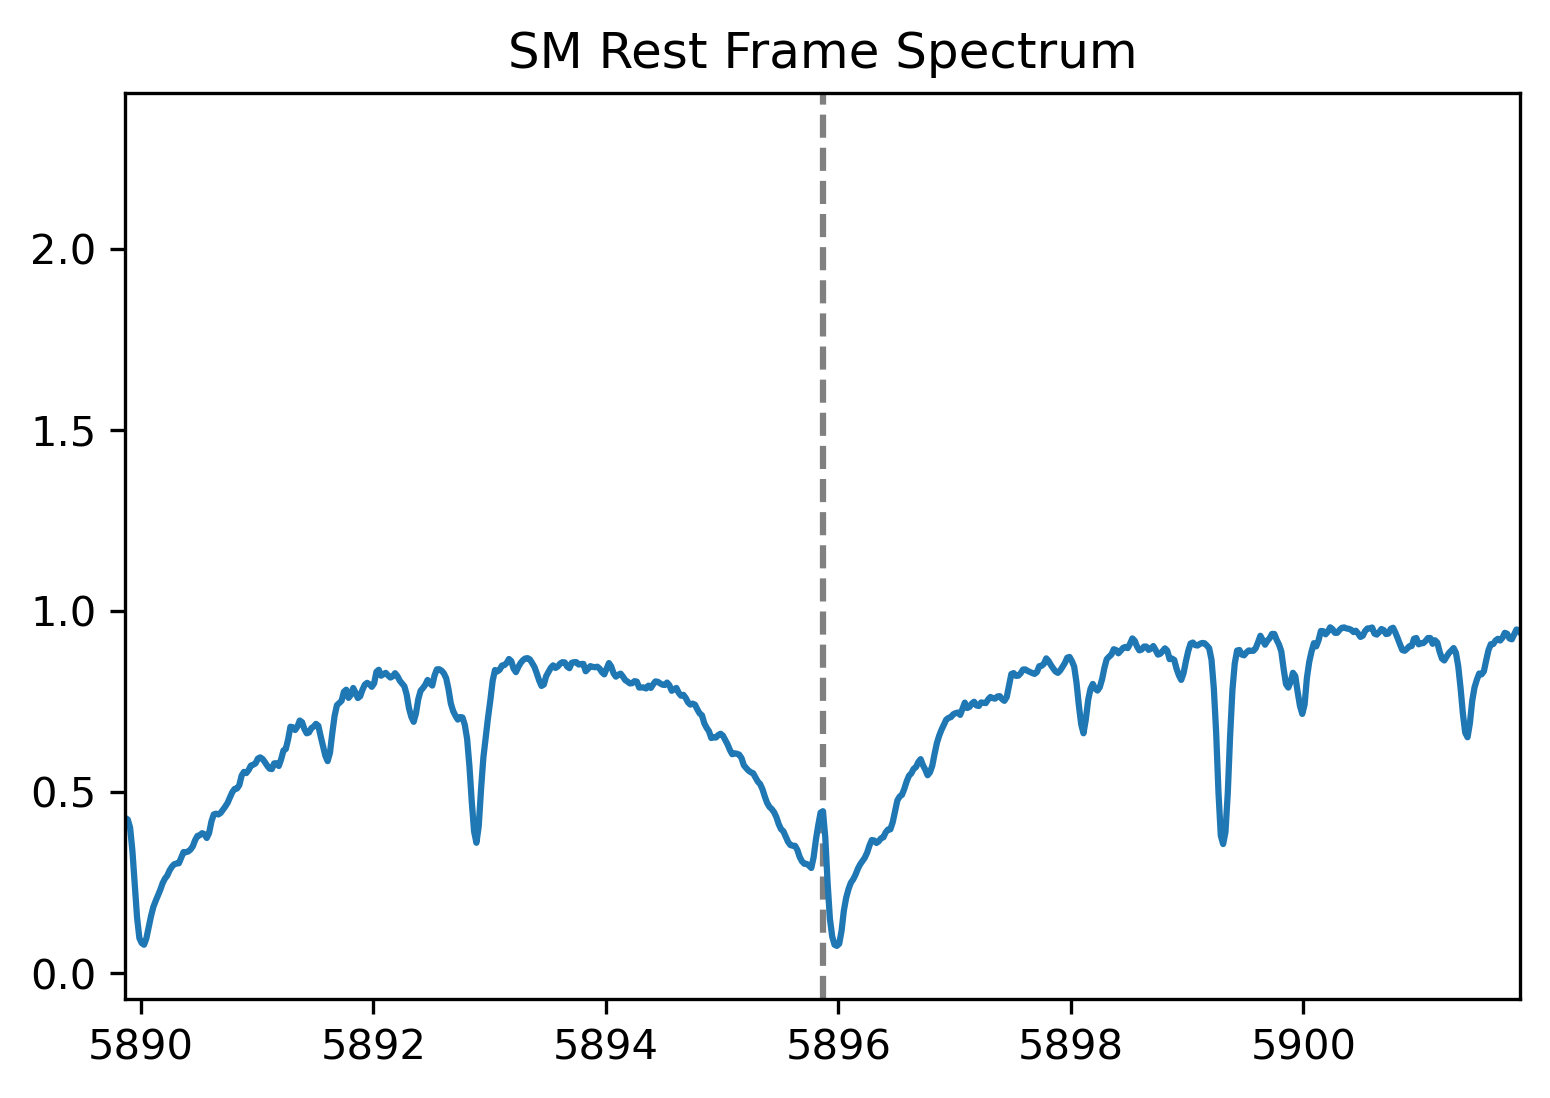

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP117463_10_NDRS.fits
HIP117463
2019-11-06T09:01:34.06


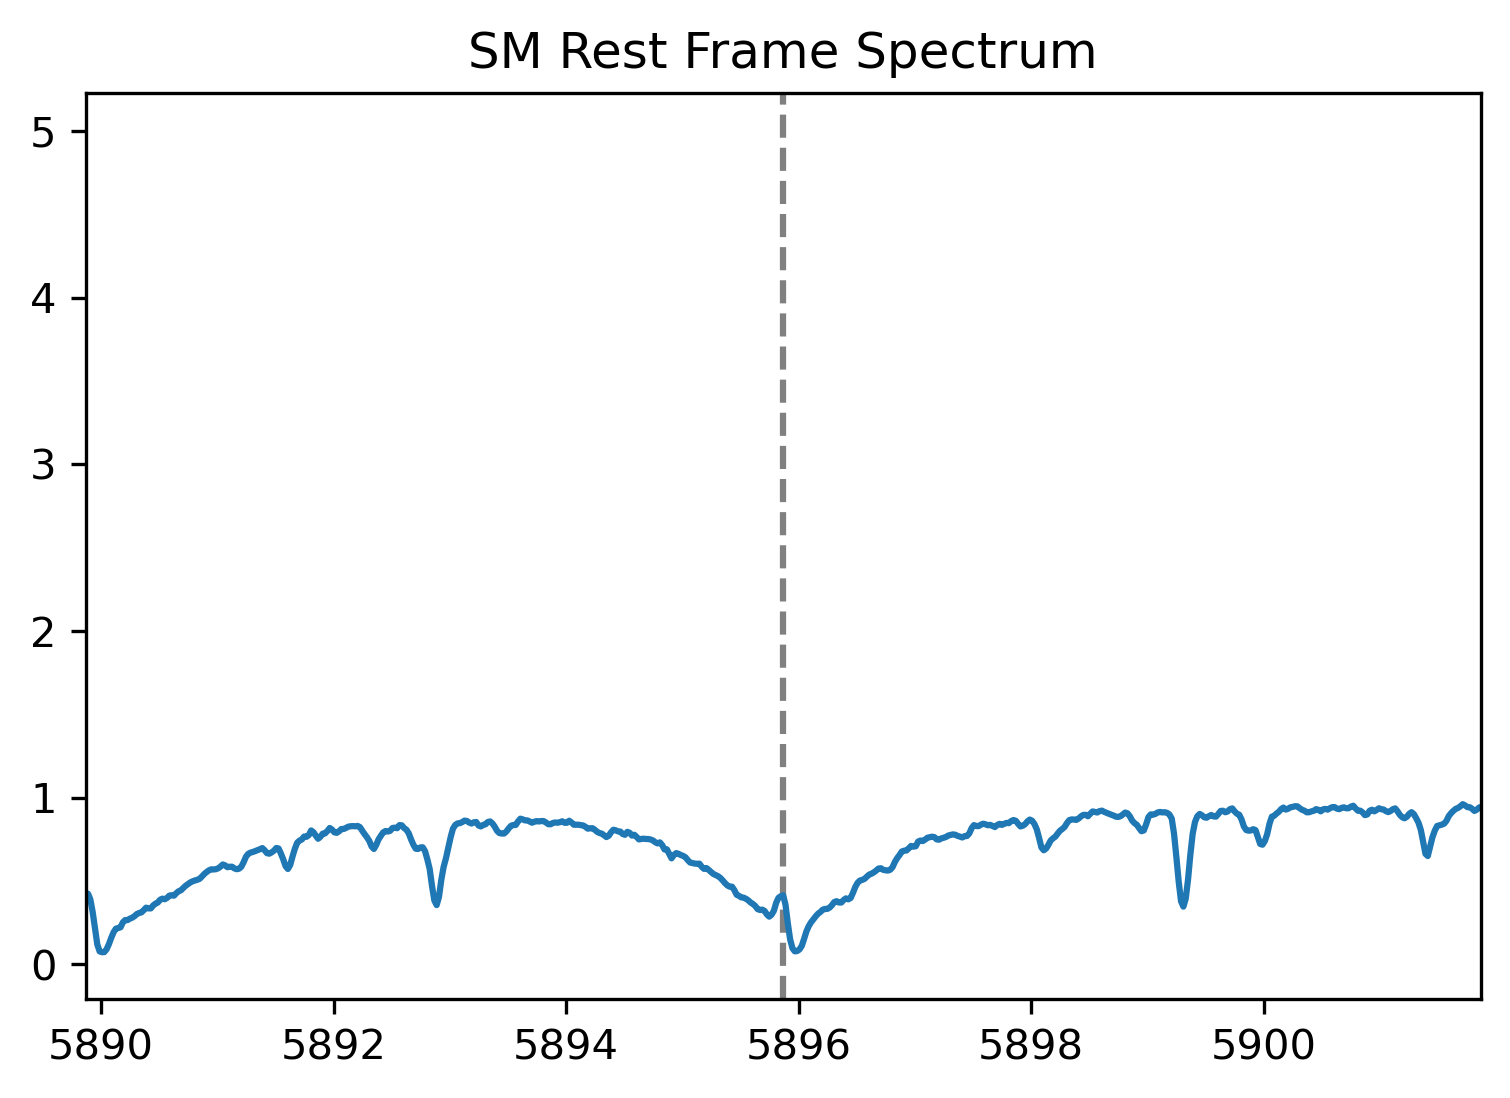

In [13]:
for file in rest_files:
    if 'NDRR' in file:
        print('skipped')
        continue
    subfile = fits.open(file)
    flux = subfile[0].data
    wl = subfile[1].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(rest_wl, ls='--', color='gray')
    plt.plot(wl, flux)
    plt.xlim(rest_wl - 6, rest_wl + 6)
    plt.title('SM Rest Frame Spectrum')
    plt.show()

## Plot SM spectra in observed frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP117463_8_NDRU.fits
HIP117463
2019-11-06T08:50:05.64


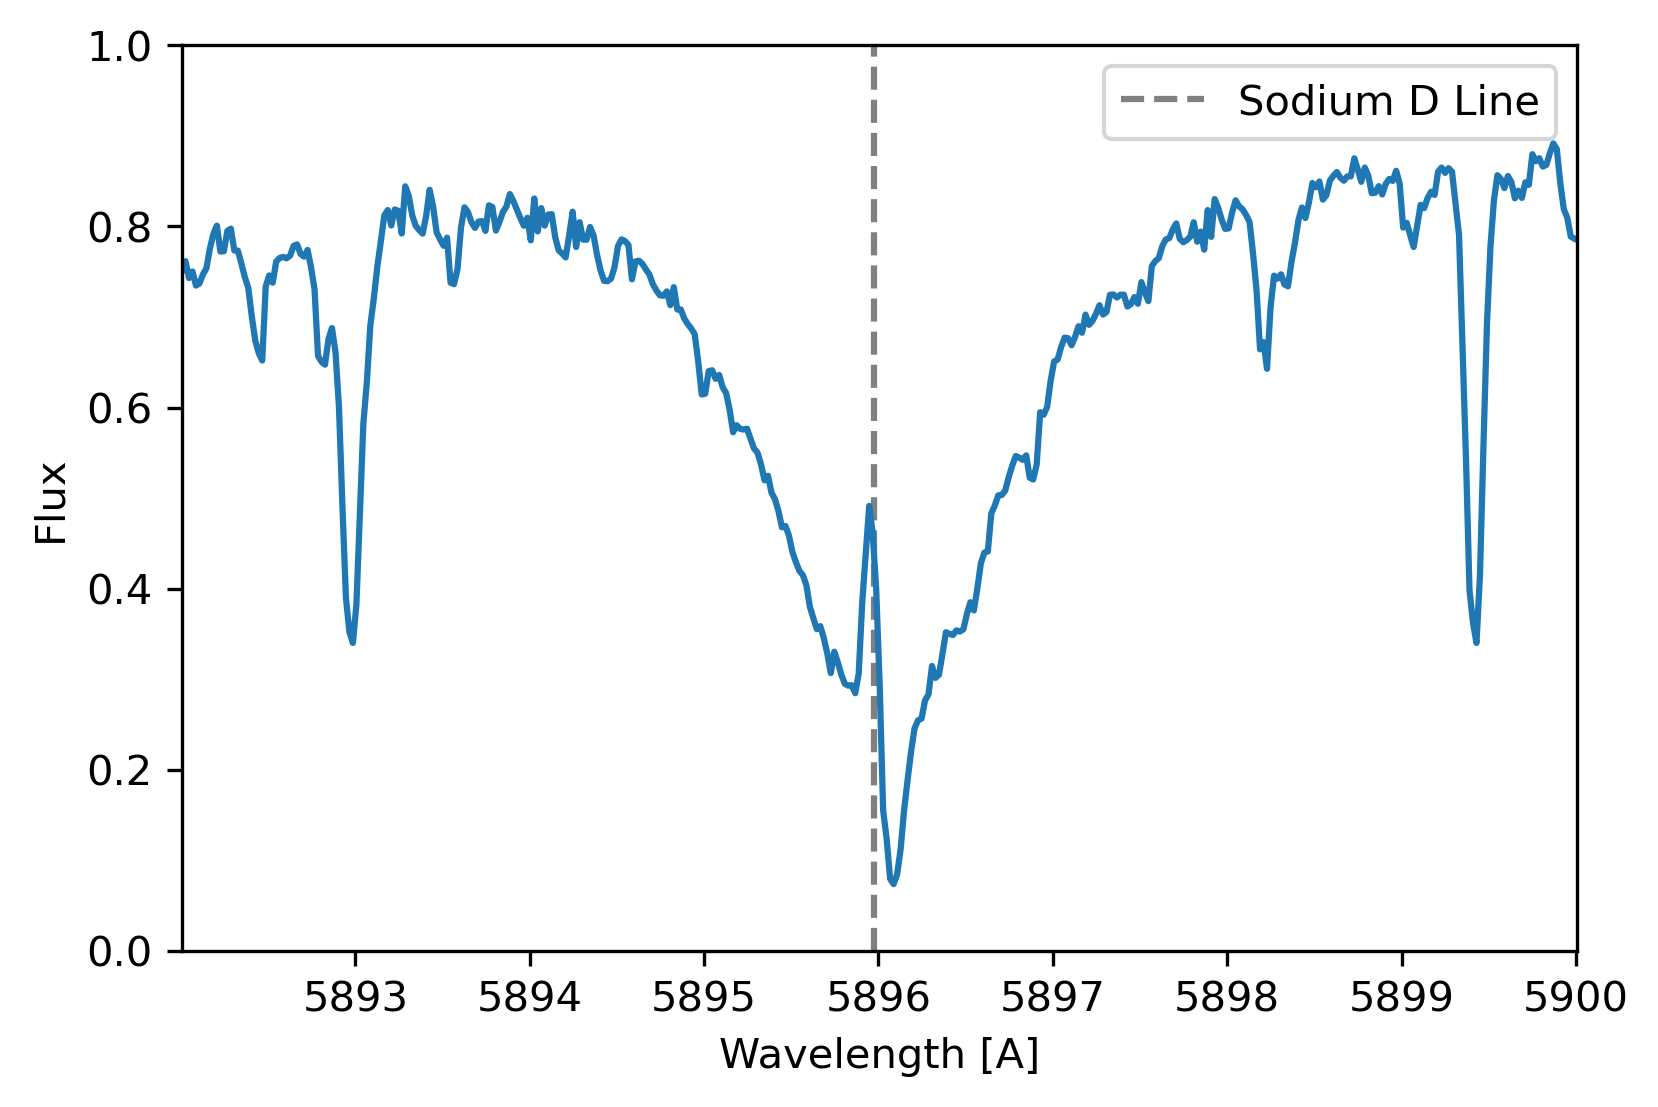

5899.98996409431
5000.005552883154
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP117463_9_NDRU.fits
HIP117463
2019-11-06T08:55:49.85


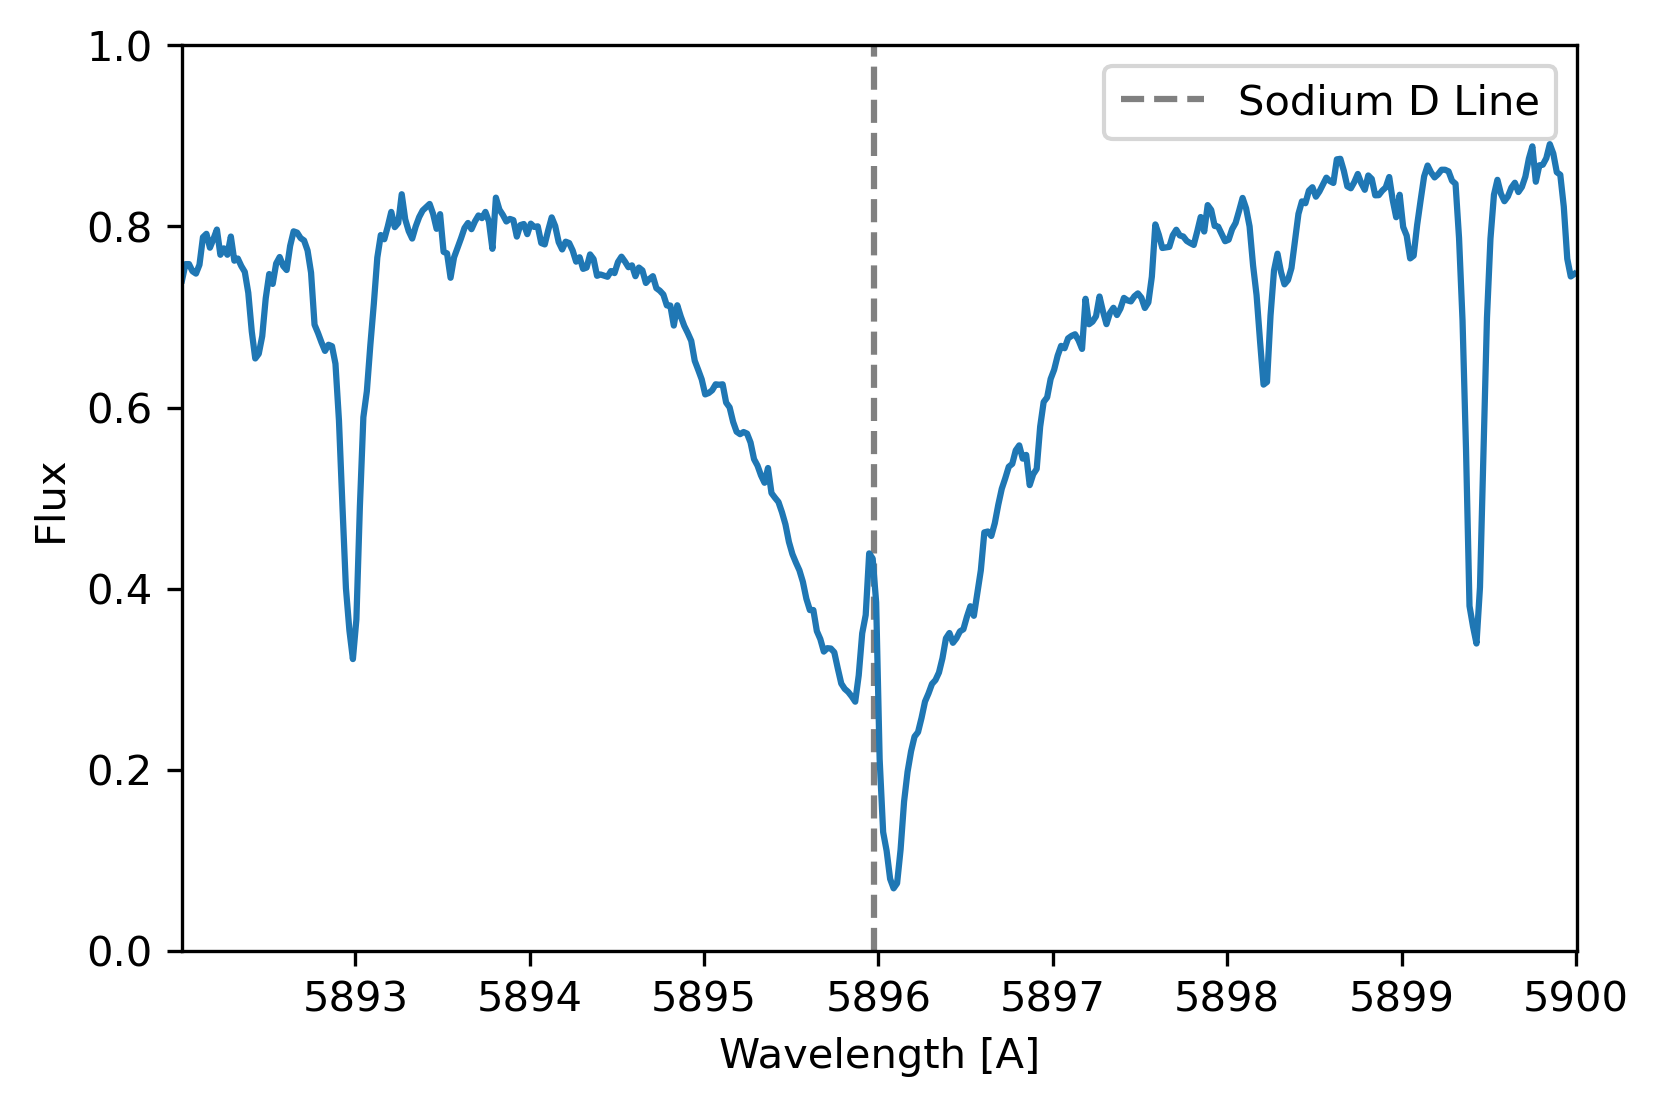

5899.98996409431
5000.005552883154
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP117463_10_NDRU.fits
HIP117463
2019-11-06T09:01:34.06


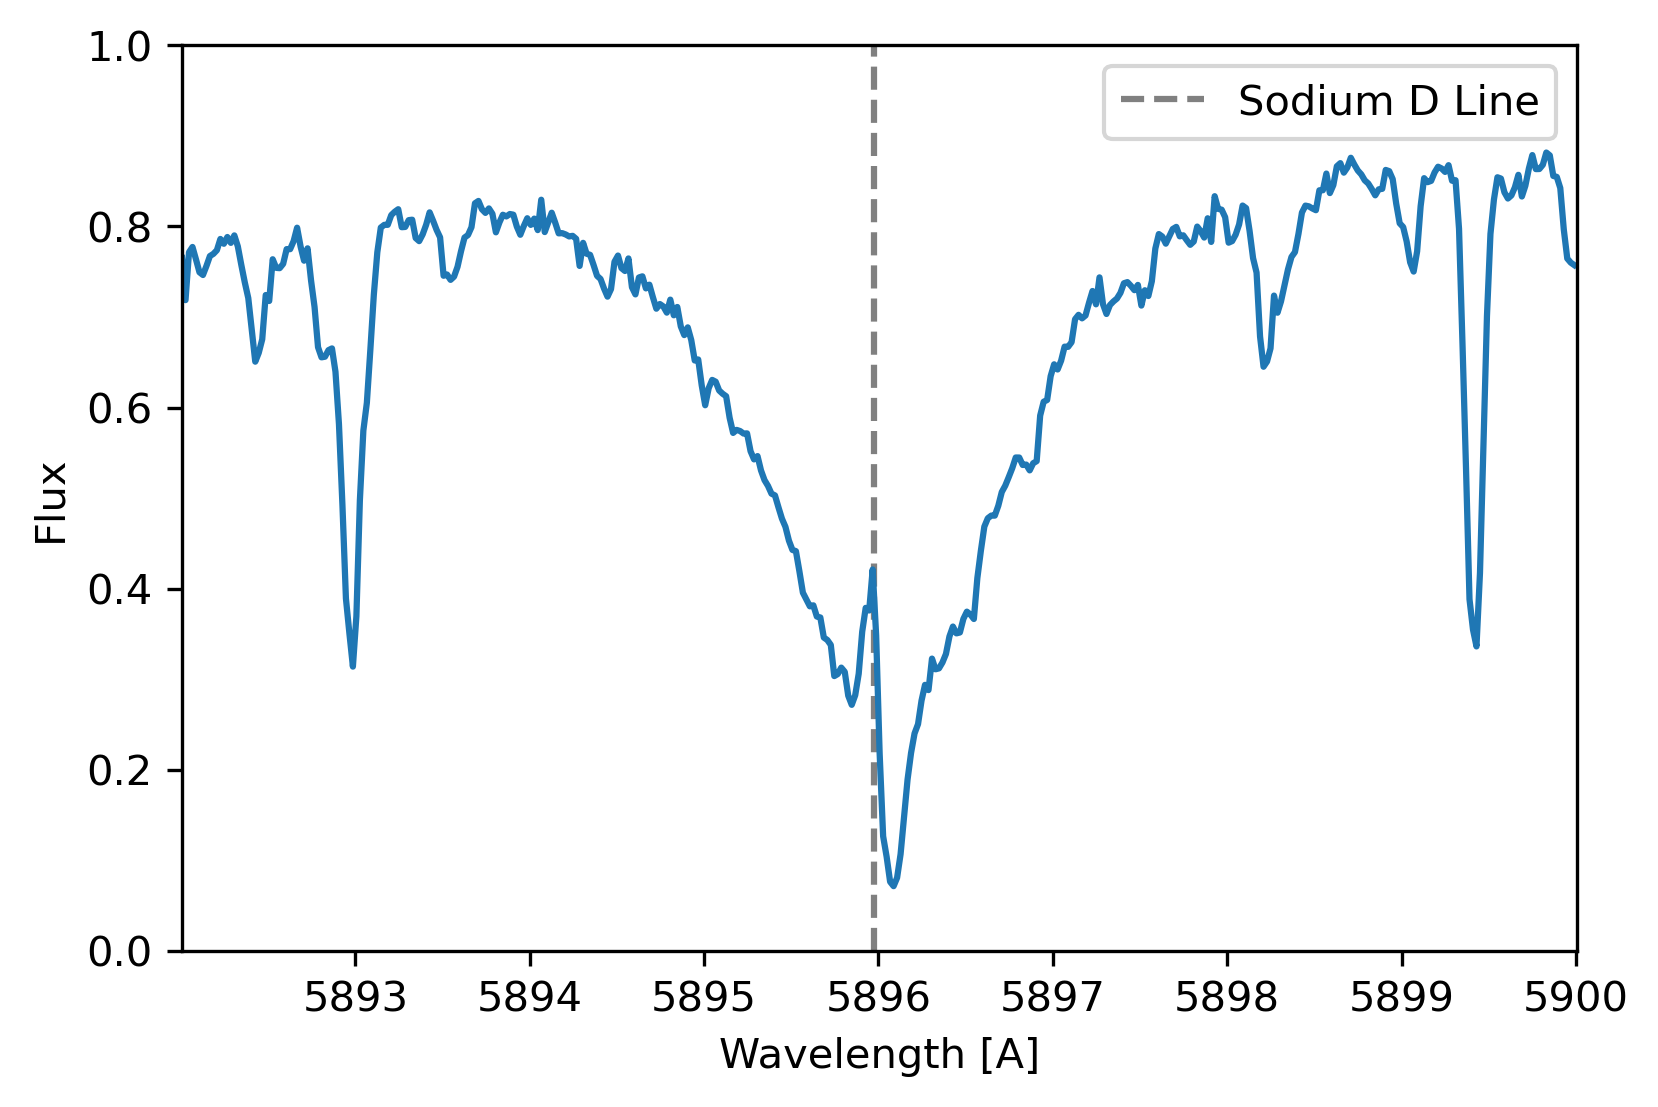

5899.98996409431
5000.005552883154


In [14]:
for file in observed_files:
    if 'NDRR' in file:
        continue
    subfile = fits.open(file)
    flux = subfile[0].data
    wl = subfile[1].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(observed_wl - .03, ls='--', color='gray', label='Sodium D Line')
    plt.plot(wl, flux)
    plt.xlim(observed_wl - 4, observed_wl + 4)
    plt.ylim(0, 1)
    # plt.title('SM Spectrum in Observed Frame')
    plt.xlabel('Wavelength [A]')
    plt.ylabel('Flux')
    plt.legend()
    plt.show()
    print(max(wl))
    print(min(wl))

## Plot all the APF plots

HIP117463
2019-11-06T08:50:05.64
/datag/blpd0/datax/apf/rbqr.546.fits


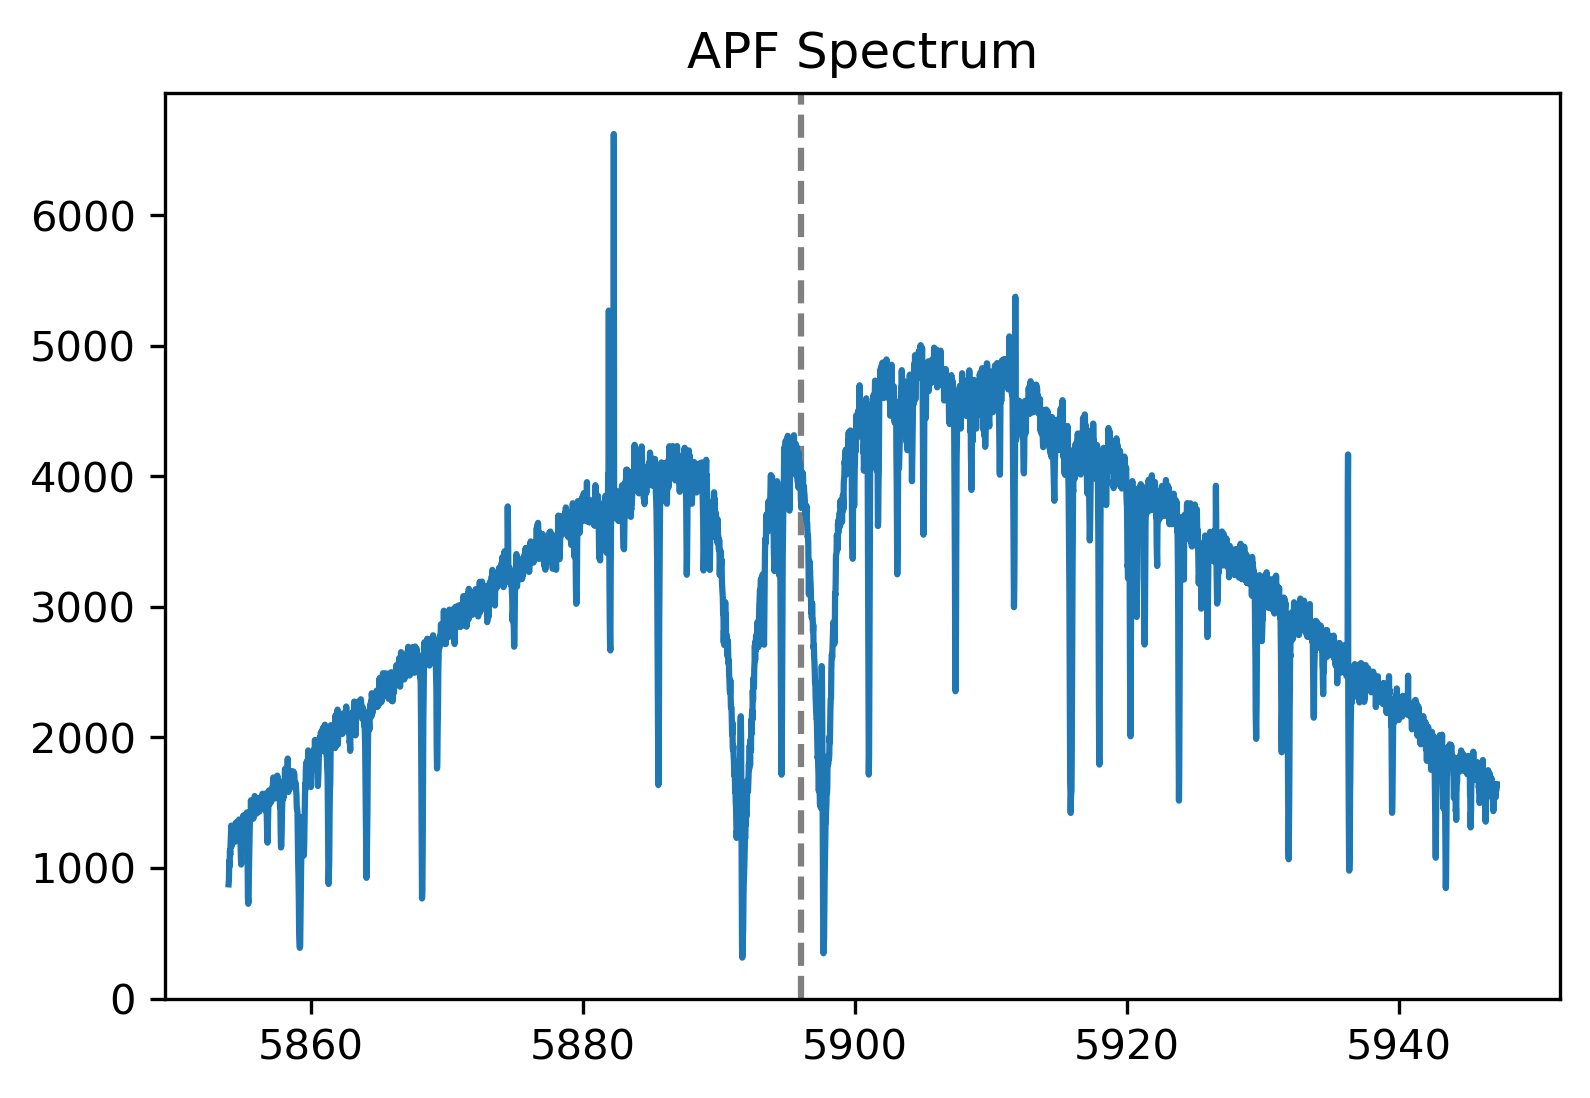

HIP117463
2019-11-06T08:55:49.85
/datag/blpd0/datax/apf/rbqr.547.fits


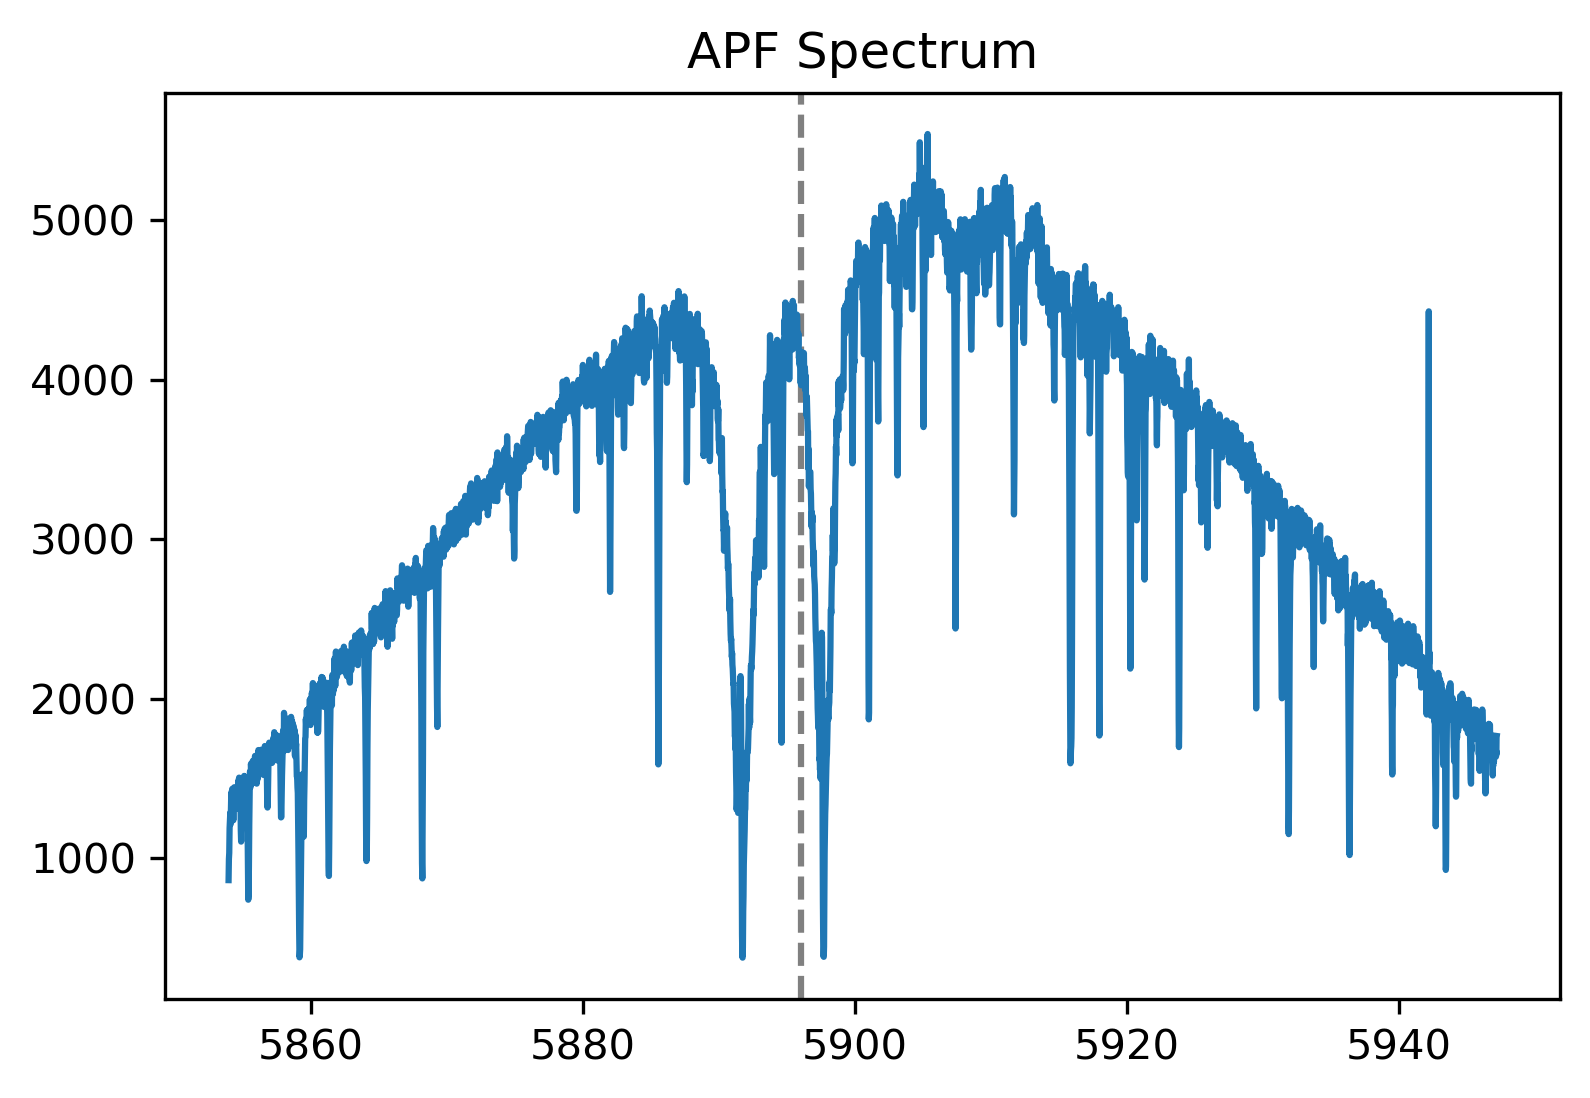

HIP117463
2019-11-06T09:01:34.06
/datag/blpd0/datax/apf/rbqr.548.fits


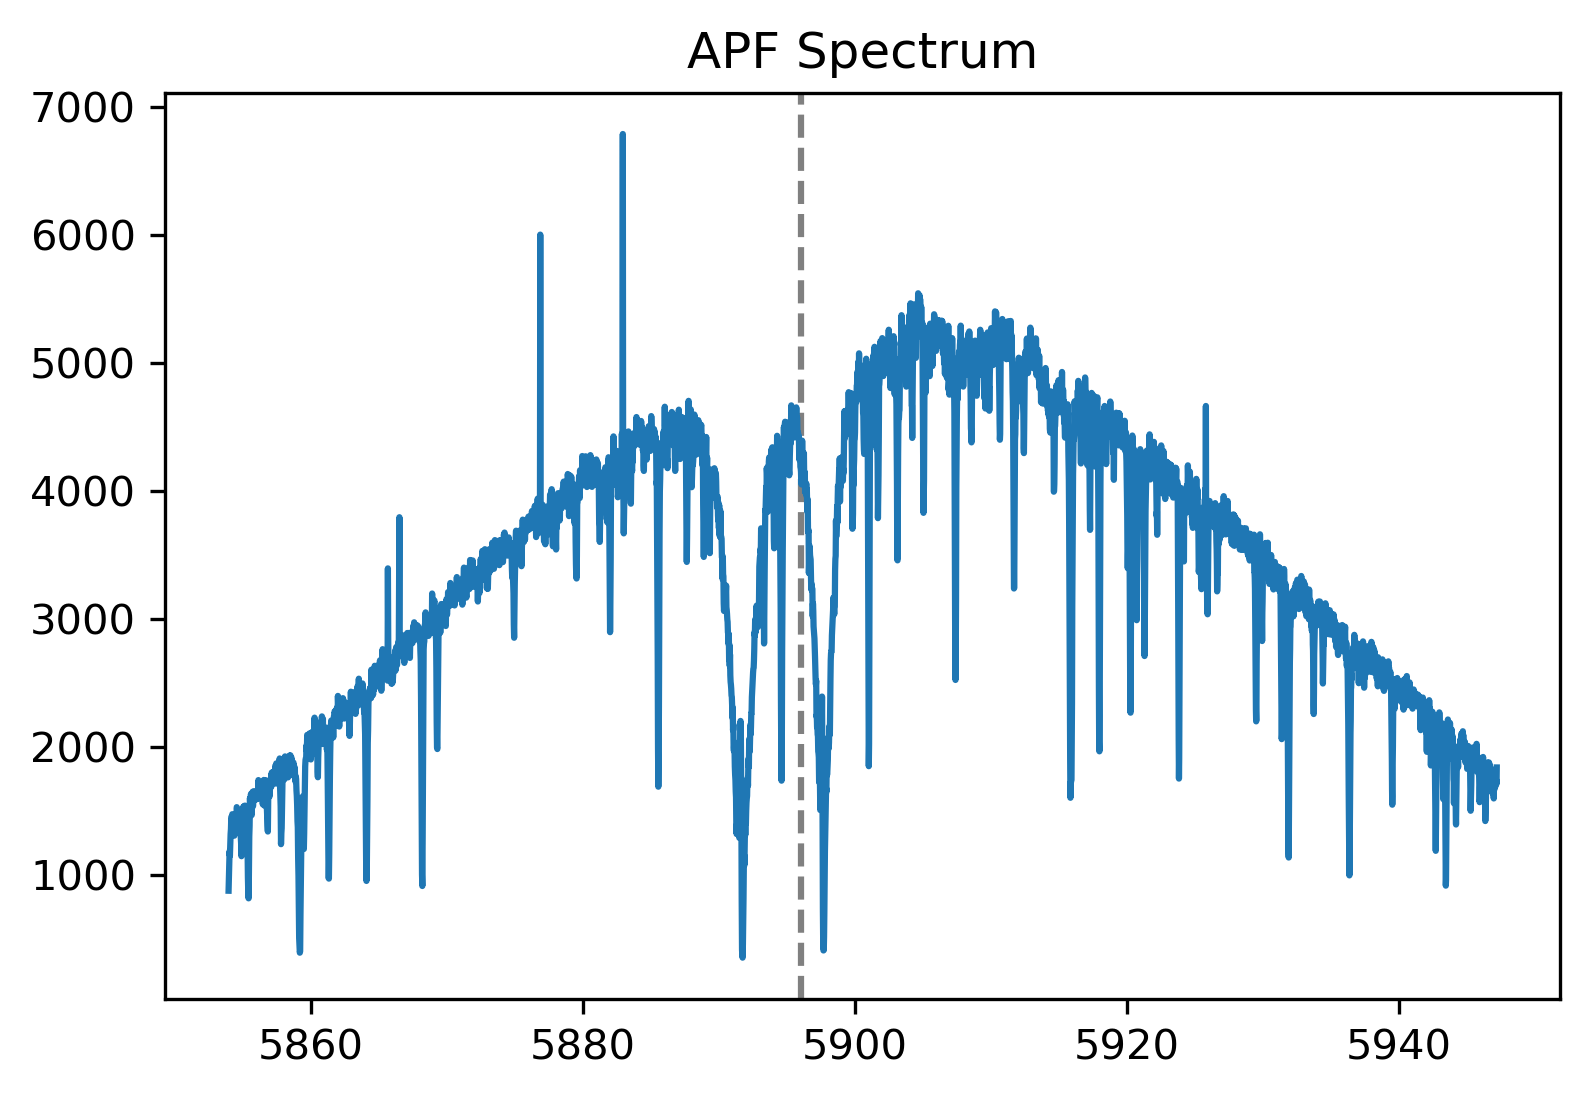

In [15]:
for file in apf_files:
    fl_file = fits.open(file)
    obj = fl_file[0].header['TOBJECT']
    date = fl_file[0].header['DATE-OBS']
    print(obj)
    print(date)
    print(file)
    fl_image = fl_file[0].data
    flux = fl_image[order][:-1]
    wl = wl_image[order]
    plt.axvline(observed_wl, ls = '--', color='gray')
    plt.plot(wl, flux)
#     plt.ylim(14000, 15000)
    # plt.xlim(observed_wl - 6, observed_wl + 6)
    plt.title('APF Spectrum')
    plt.show()